In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
import gdown

# File ID from your Google Drive shareable link
file_id = "1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg"

# Construct the URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output="myfile.xlsx", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /home/vivobook/Learning/ML/notebooks/Advanced-ML/TimeSeries-1/myfile.xlsx
100%|██████████| 13.7k/13.7k [00:00<00:00, 18.9MB/s]


'myfile.xlsx'

In [111]:

mobile_sales = pd.read_excel("myfile.xlsx")


In [112]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [113]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [114]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [115]:
mobile_sales.index

RangeIndex(start=0, stop=217, step=1)

In [116]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [117]:
mobile_sales.set_index("DATE" , inplace =True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


In [118]:
plt.rcParams['figure.figsize'] = (20, 6)

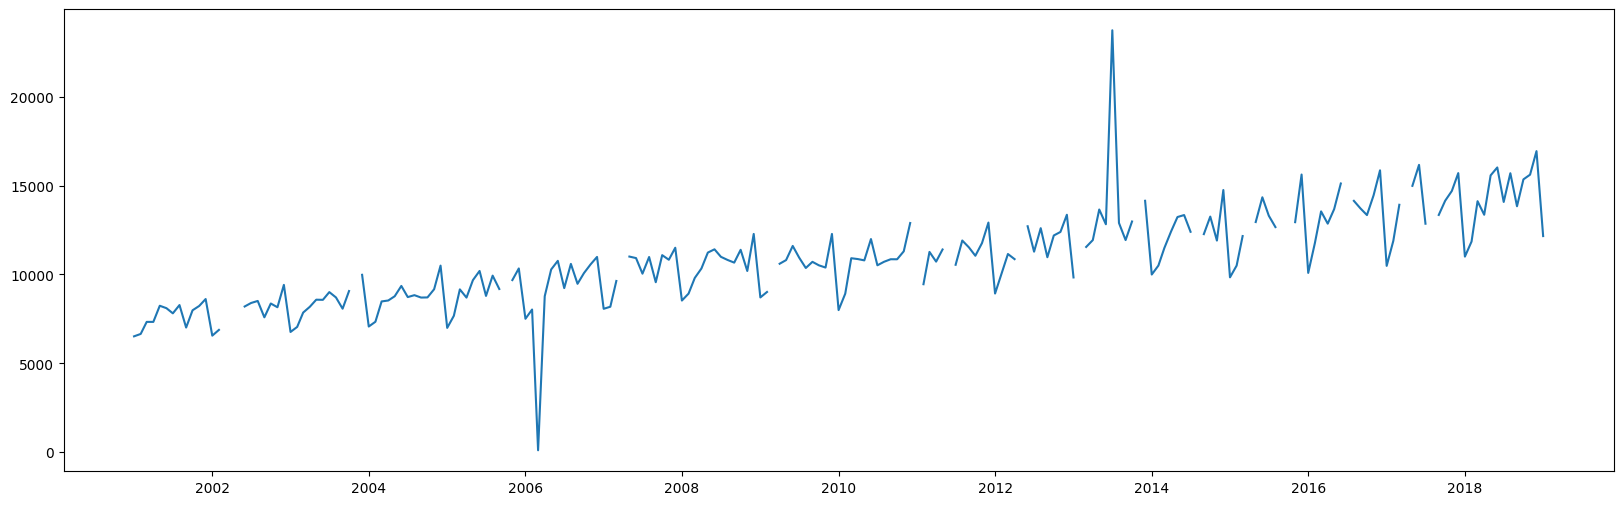

In [119]:
plt.plot(mobile_sales["Sales"])

In [120]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

In [121]:
mobile_sales.loc[mobile_sales["Sales"].isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [122]:
imputed_sales  = mobile_sales["Sales"].fillna(mobile_sales["Sales"].mean())
imputed_sales
normal_sales = mobile_sales["Sales"]

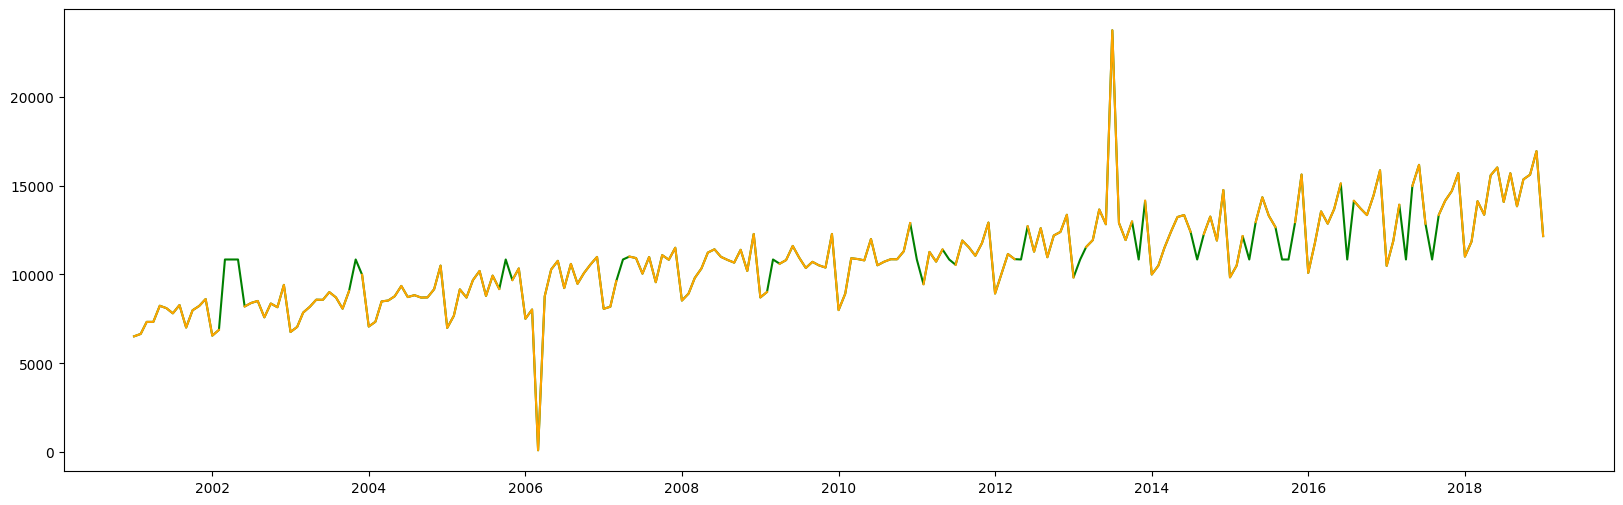

In [123]:
plt.plot(imputed_sales , label="Imputed" , color="green")
plt.plot(normal_sales, label="Normal" , color="orange")
plt.show()

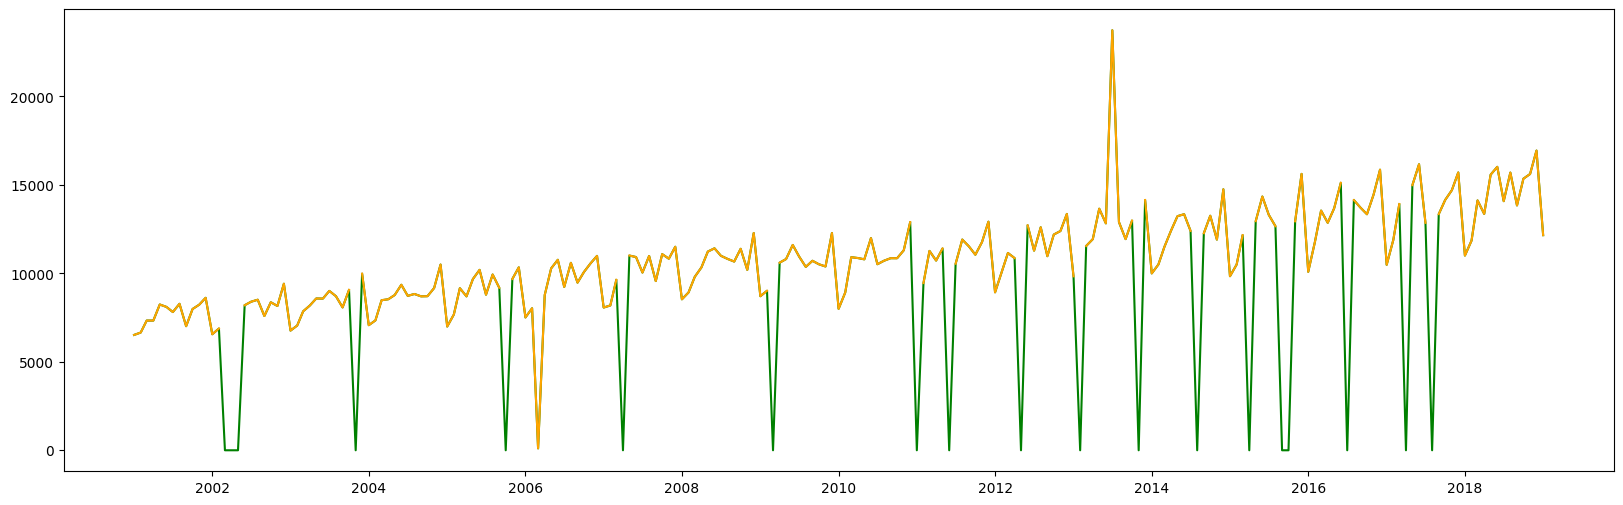

In [124]:
plt.plot(mobile_sales["Sales"].fillna(0) , label="Imputed" , color = "green")
plt.plot(mobile_sales["Sales"] ,label="Normal" , color = "orange")
plt.show()


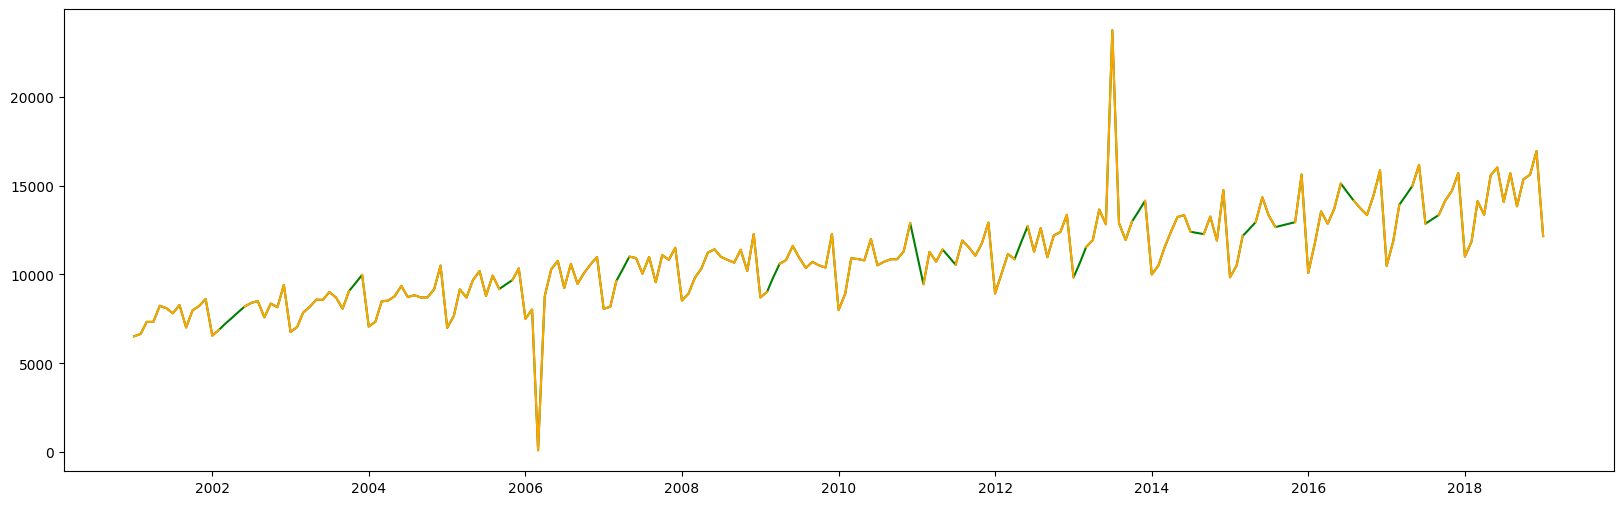

In [125]:
plt.plot(mobile_sales["Sales"].interpolate(method="linear") , label="Imputed" , color = "green")
plt.plot(mobile_sales["Sales"] ,label="Normal" , color = "orange")
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  2.,  4.,  3.,  2.,  3.,  6.,  8.,  7., 11.,  6.,  4.,
         4.,  4.,  6.,  6.,  9., 10., 13.,  8.,  7.,  5.,  6.,  4.,  6.,
         3.,  5.,  6.,  3.,  6.,  3.,  2.,  5.,  2.,  2.,  1.,  1.,  1.,
         5.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  108.  ,   344.32,   580.64,   816.96,  1053.28,  1289.6 ,
         1525.92,  1762.24,  1998.56,  2234.88,  2471.2 ,  2707.52,
         2943.84,  3180.16,  3416.48,  3652.8 ,  3889.12,  4125.44,
         4361.76,  4598.08,  4834.4 ,  5070.72,  5307.04,  5543.36,
         5779.68,  6016.  ,  6252.32,  6488.64,  6724.96,  6961.28,
         7197.6 ,  7433.92,  7670.24,  7906.56,  8142.88,  8379.2 ,
         8615.52,  8851.84

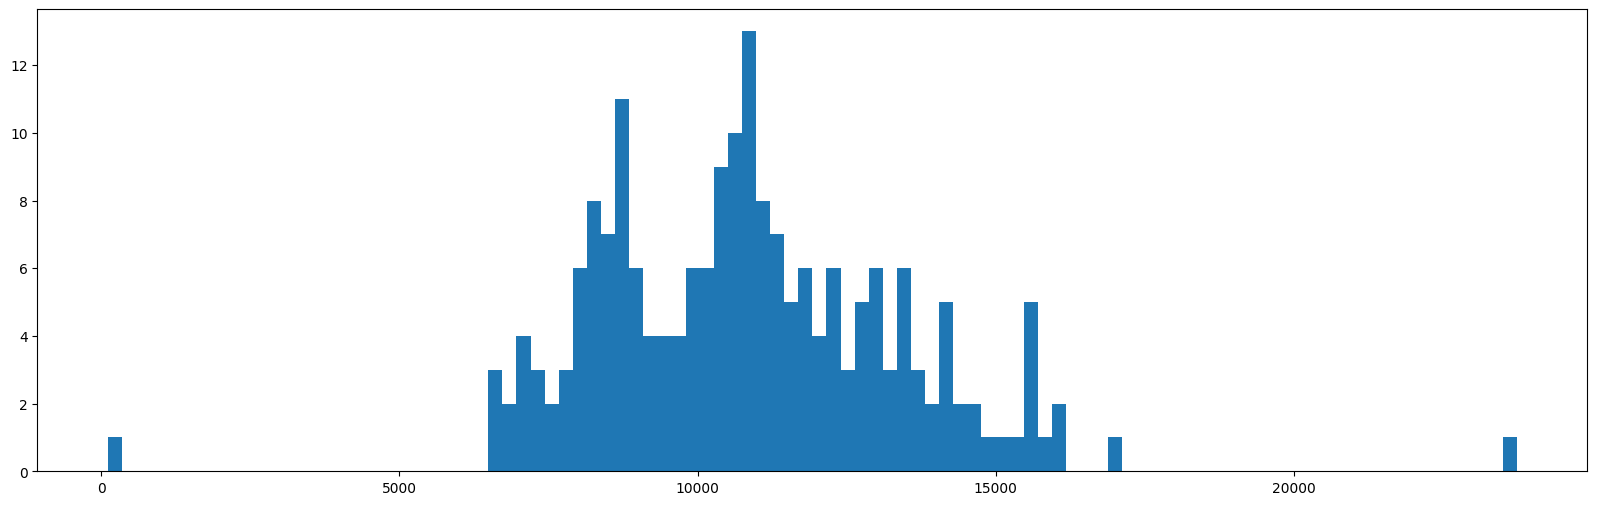

In [126]:
plt.hist(mobile_sales["Sales"] , bins=100)

The above graphs shows that there are two outliers

In [127]:
mobile_sales["Sales"].interpolate(method="linear" , inplace=True)

<Axes: xlabel='DATE'>

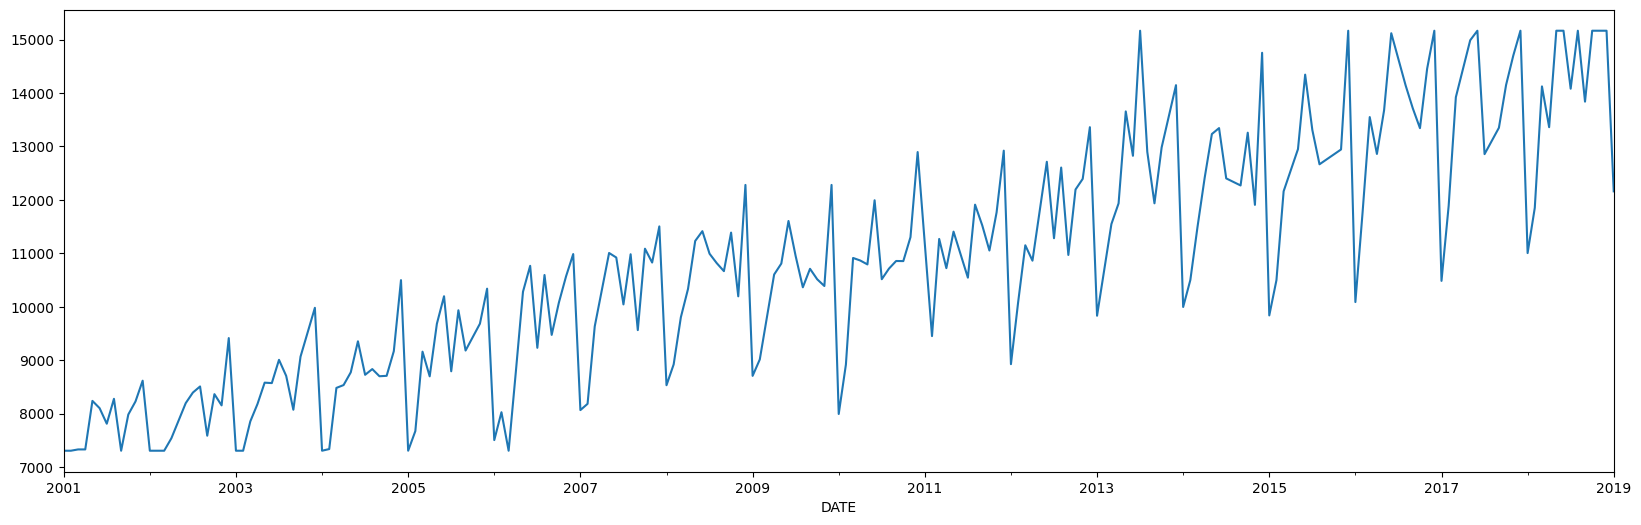

In [128]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

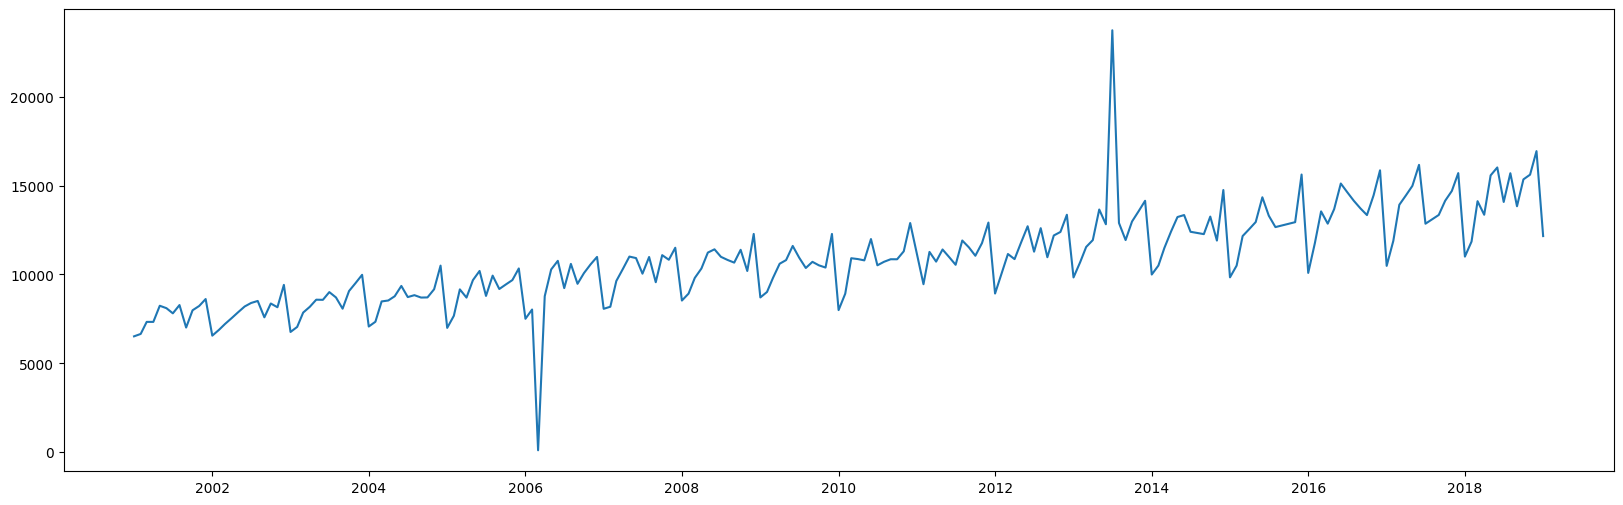

In [129]:
plt.plot(mobile_sales["Sales"])

In [130]:
mobile_sales["Sales"] = mobile_sales["Sales"].clip(upper=mobile_sales["Sales"].quantile(0.95) , lower=mobile_sales["Sales"].quantile(0.05))

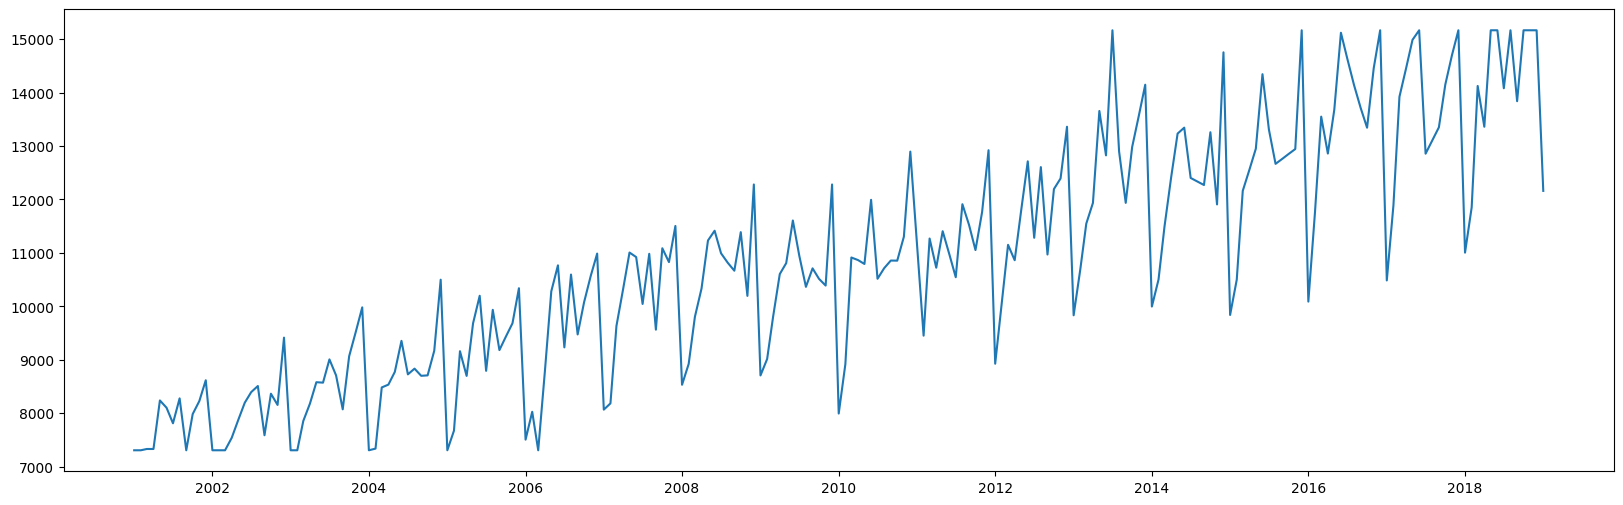

In [131]:
plt.plot(mobile_sales["Sales"])

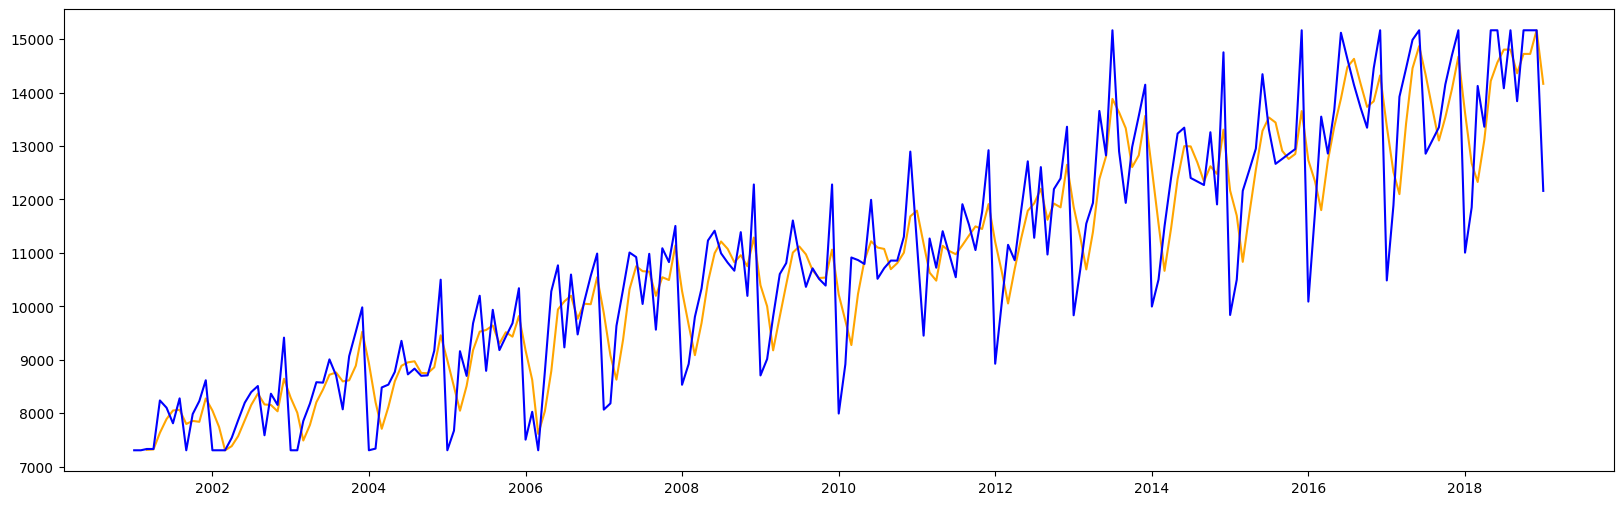

In [132]:
plt.plot(mobile_sales["Sales"].rolling(3 , center=False).mean() , label="Smoothened" , color="orange")
plt.plot(mobile_sales["Sales"] , label="normal" , color="blue")

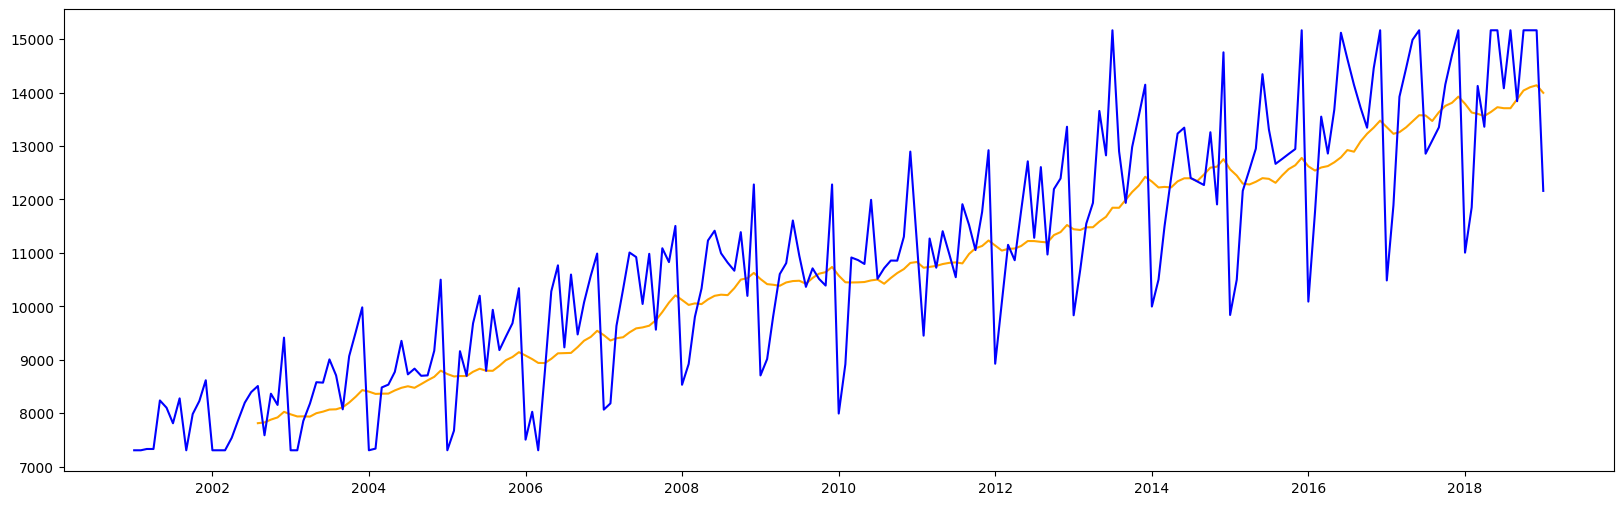

In [133]:
plt.plot(mobile_sales["Sales"].rolling(20 , center=False).mean() , label="Smoothened" , color="orange")
plt.plot(mobile_sales["Sales"] , label="normal" , color="blue")

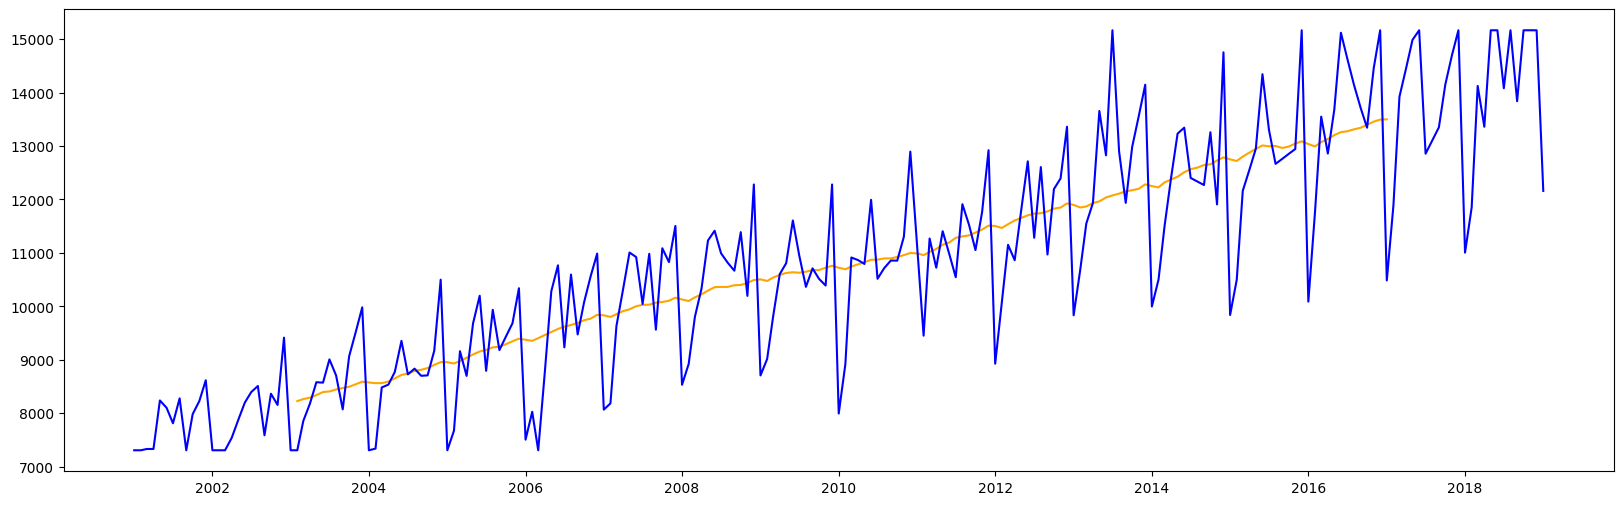

In [134]:
plt.plot(mobile_sales["Sales"].rolling(50 , center=True).mean() , label="Smoothened" , color="orange")
plt.plot(mobile_sales["Sales"] , label="normal" , color="blue")

In [135]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"] , model='additive')

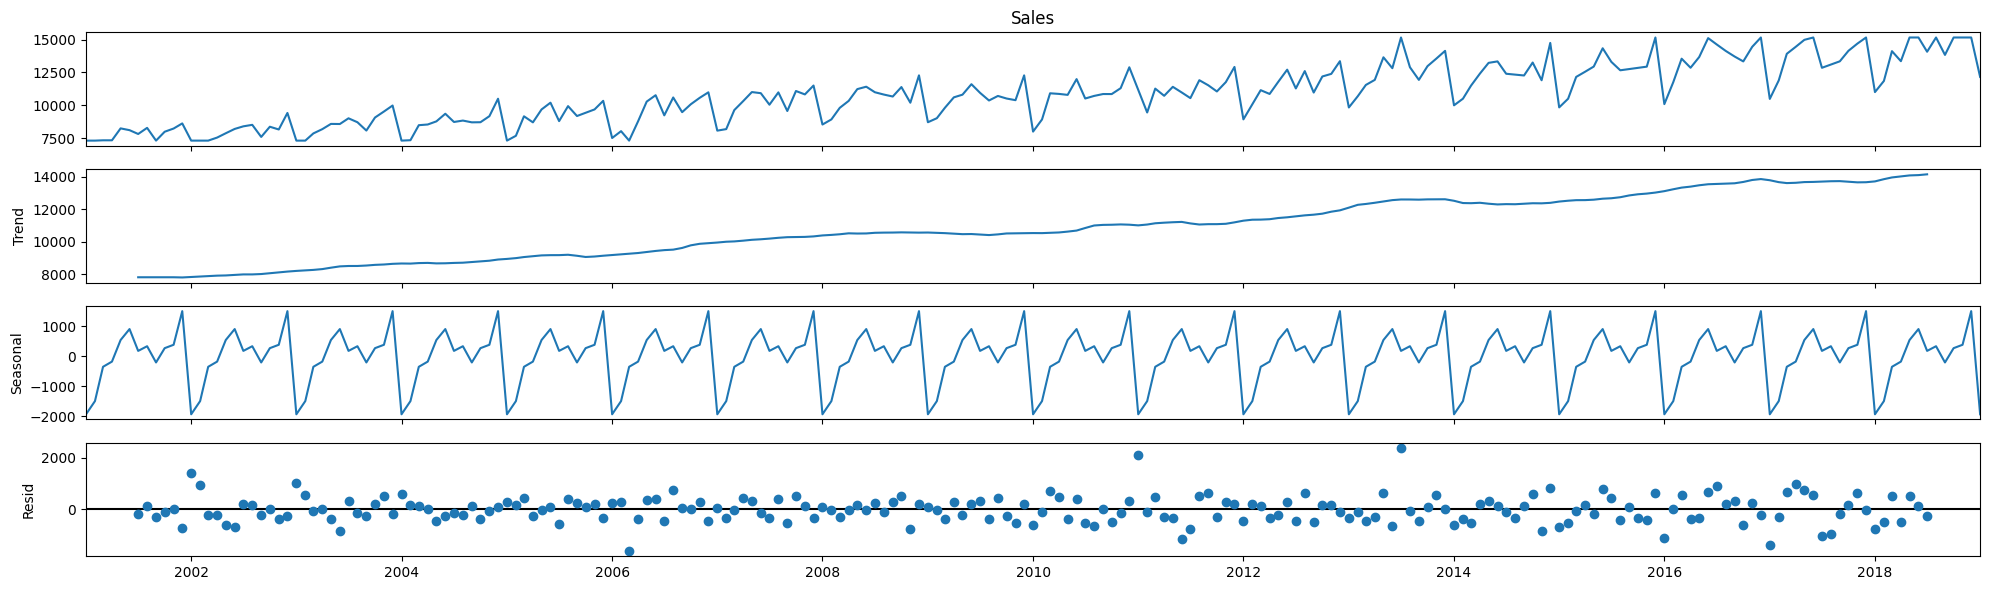

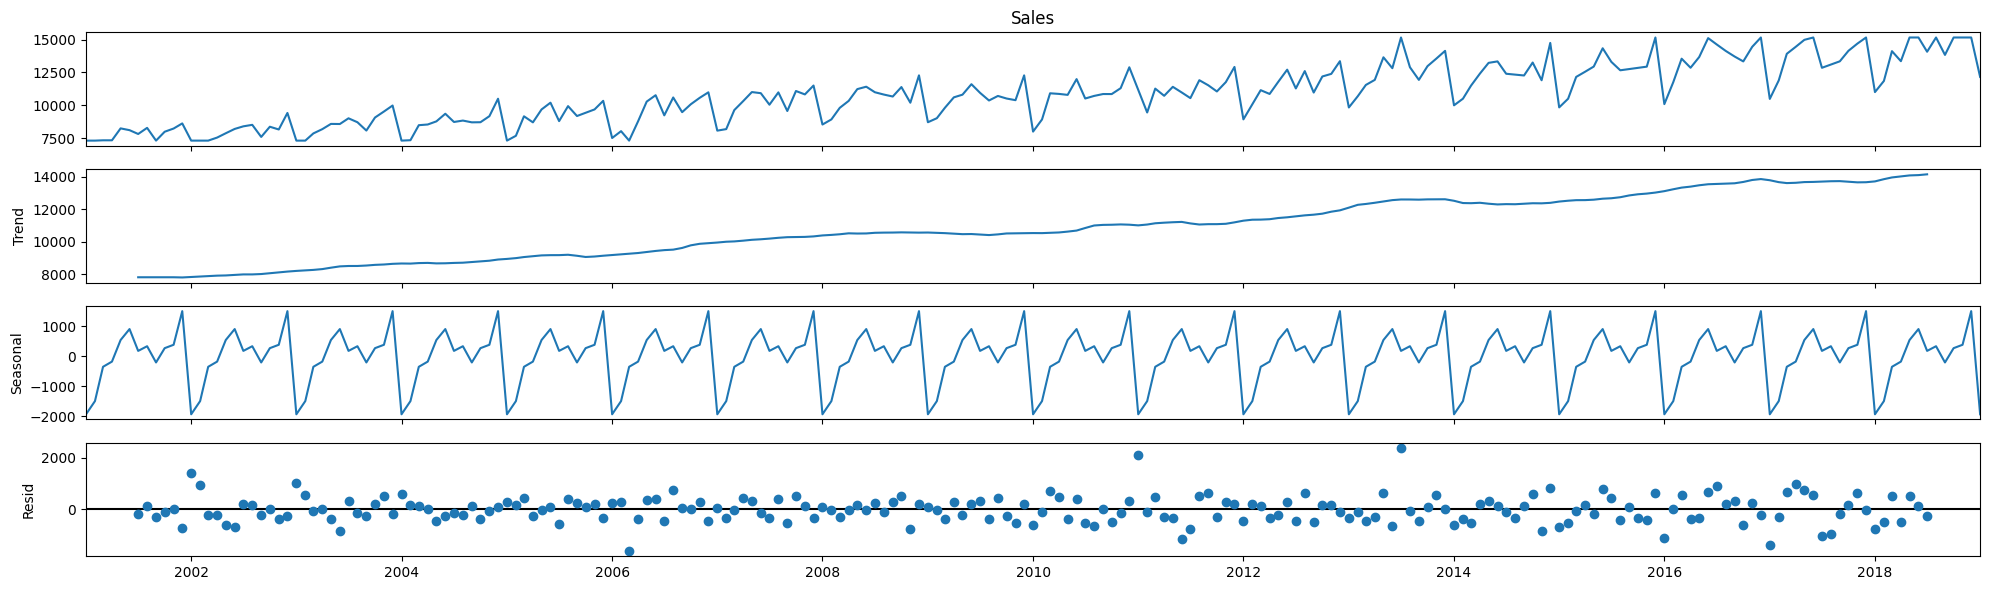

In [136]:
model.plot()

<Axes: xlabel='DATE'>

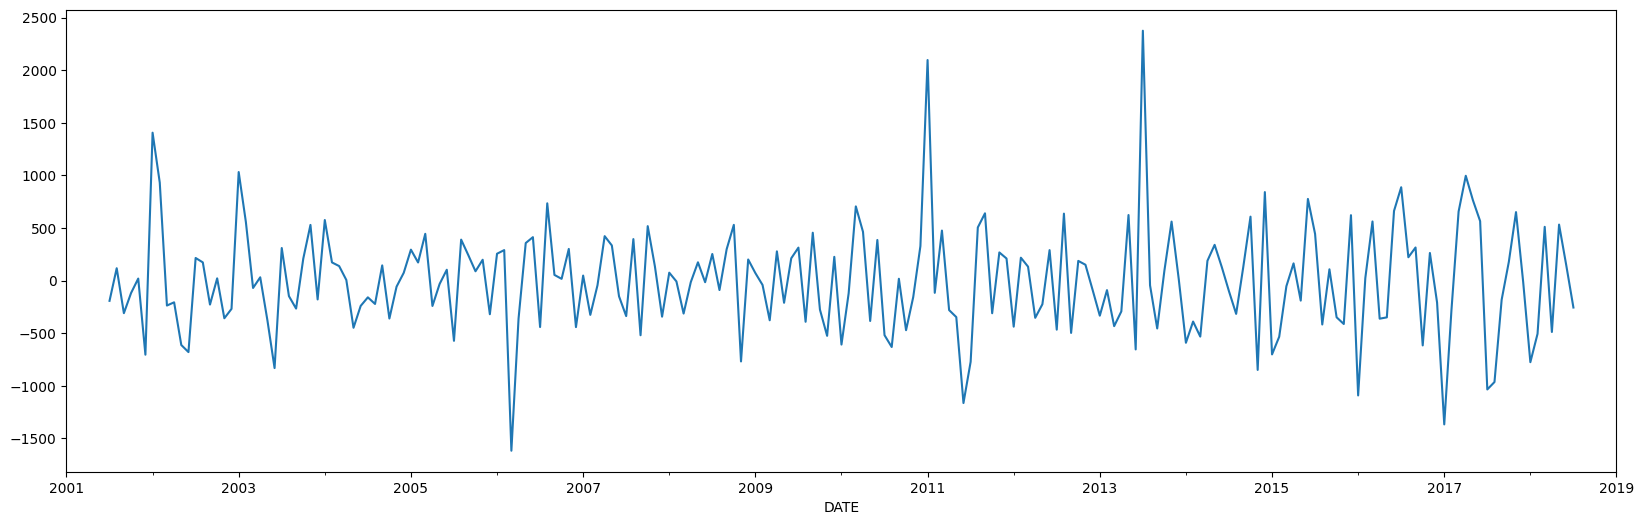

In [137]:
model.resid.plot()

<Axes: >

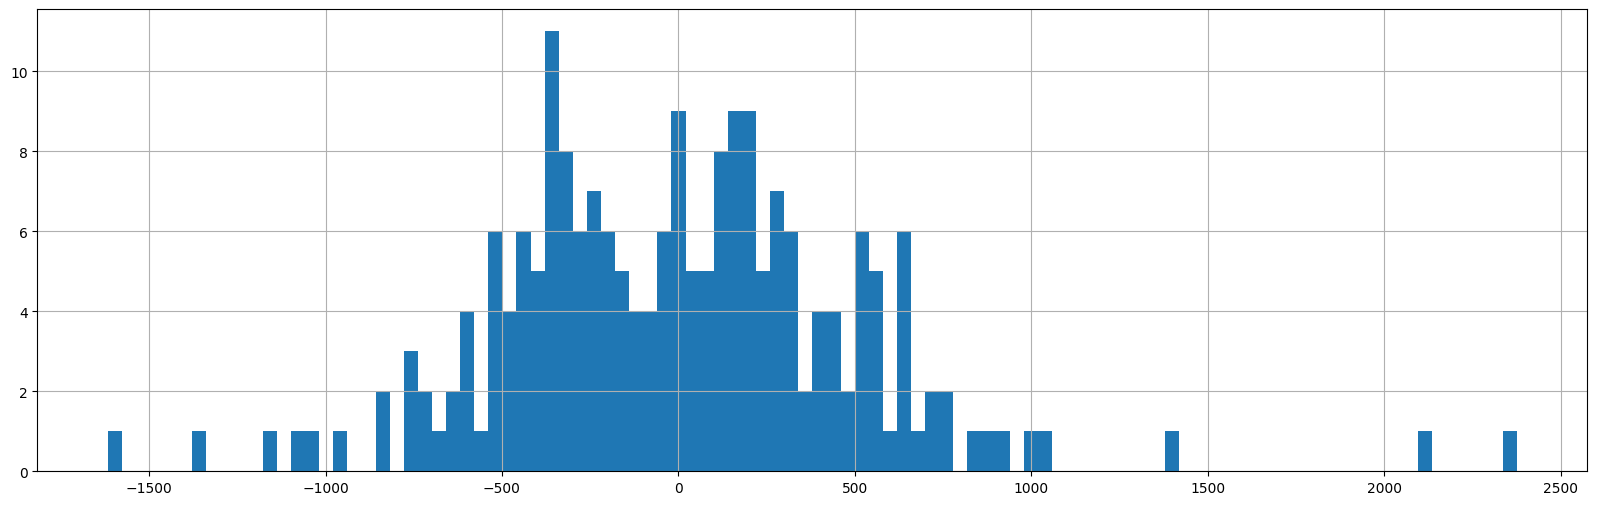

In [138]:
model.resid.hist(bins=100)

<Axes: xlabel='DATE'>

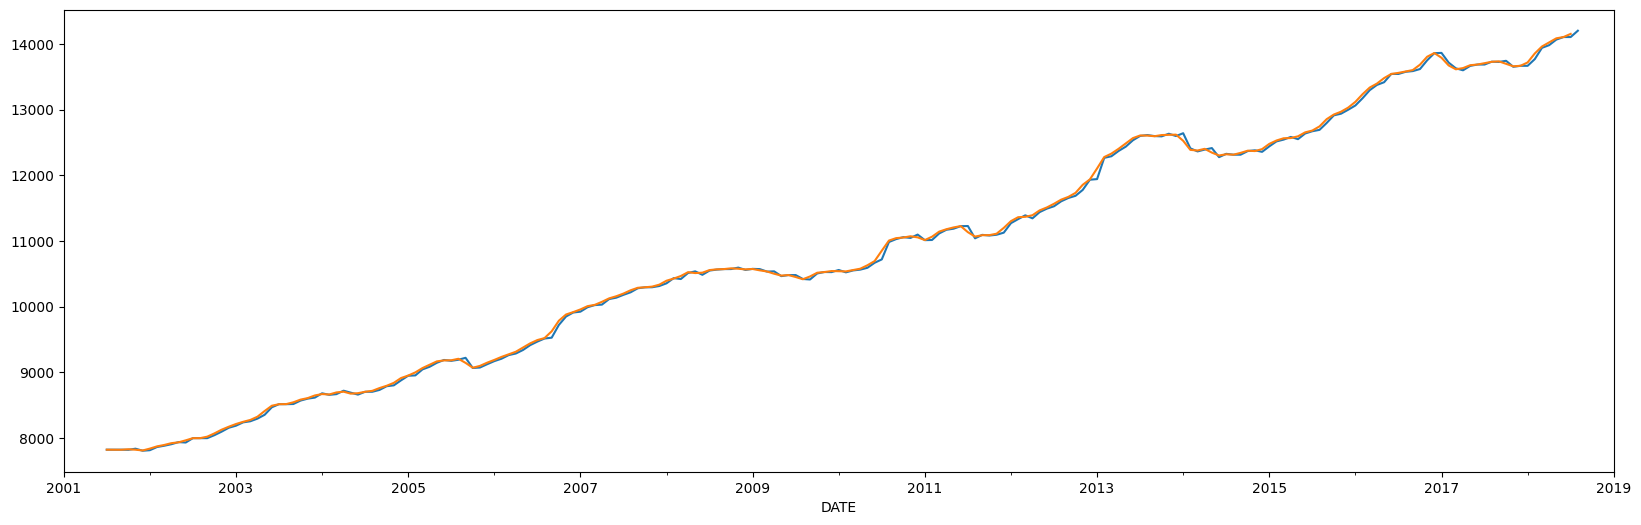

In [139]:
# decomposition from scratch
trends = mobile_sales.Sales.rolling(12,center=True).mean()
trends.plot()
model.trend.plot()

<Axes: xlabel='DATE'>

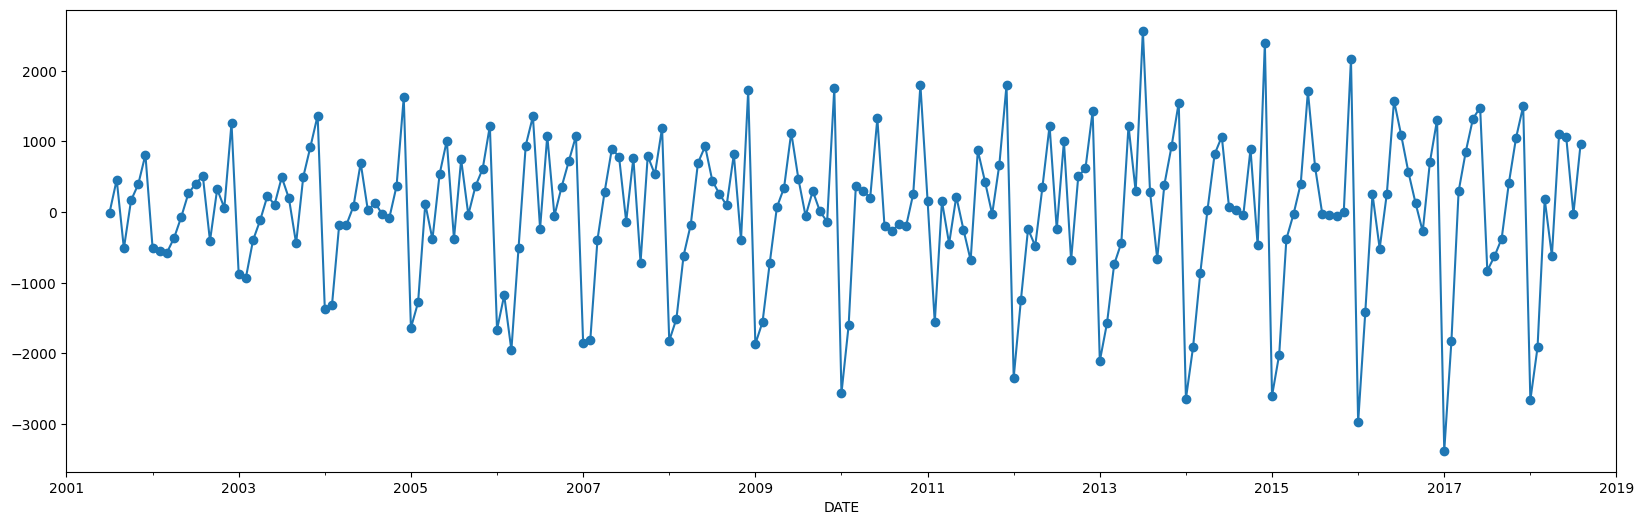

In [140]:
de_trend  = mobile_sales["Sales"] - trends
de_trend.plot(style='-o')

In [141]:
dtf = mobile_sales.reset_index()
dtf

,DATE,Sales
0,2001-01-01,7307.8
1,2001-02-01,7307.8
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
...,...,...
212,2018-09-01,13838.0
213,2018-10-01,15164.6
214,2018-11-01,15164.6
215,2018-12-01,15164.6


<Axes: xlabel='DATE'>

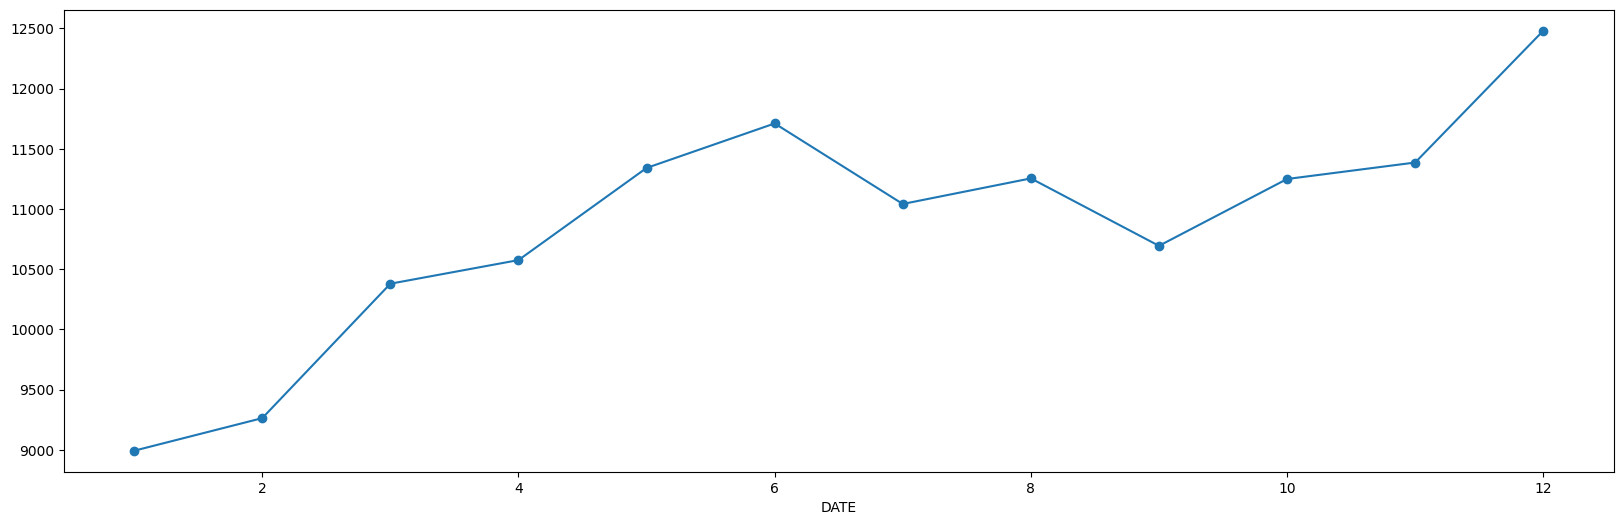

In [142]:
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

In [143]:
# SES
model = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level= 1/(24)).fittedvalues)

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vivobook/.local/lib/python3.13/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


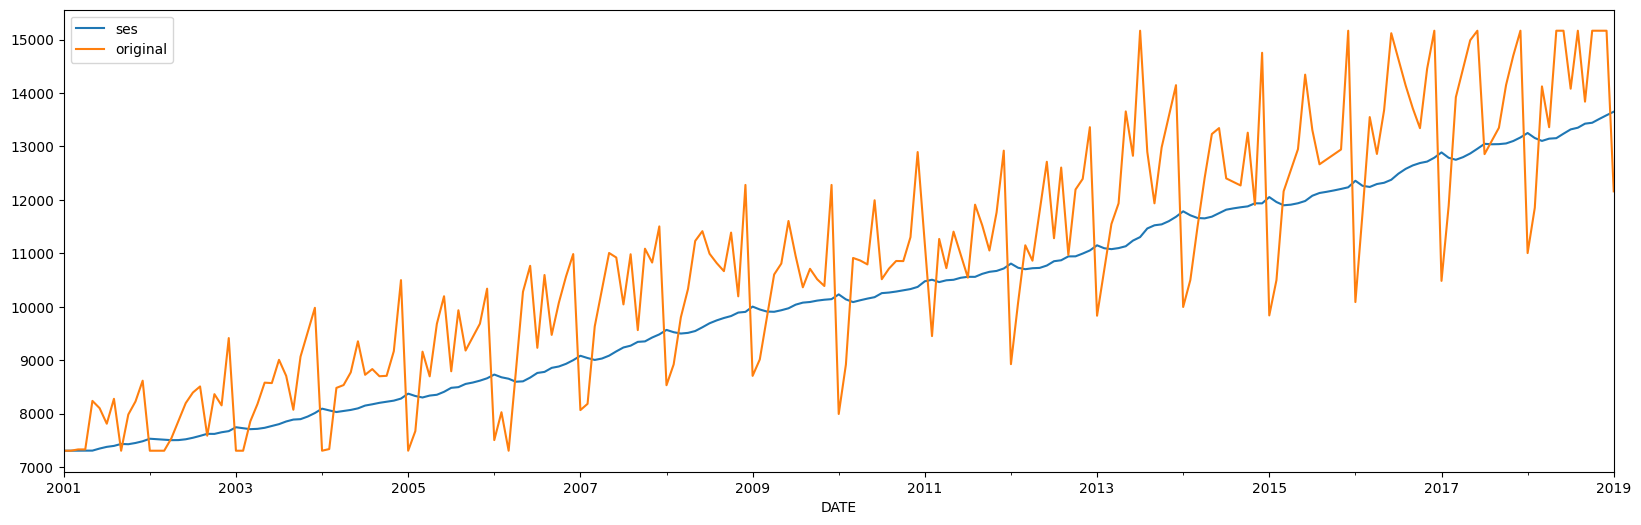

In [144]:
model.plot(label='ses')
mobile_sales.Sales.plot(label='original')
plt.legend()

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vivobook/.local/lib/python3.13/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


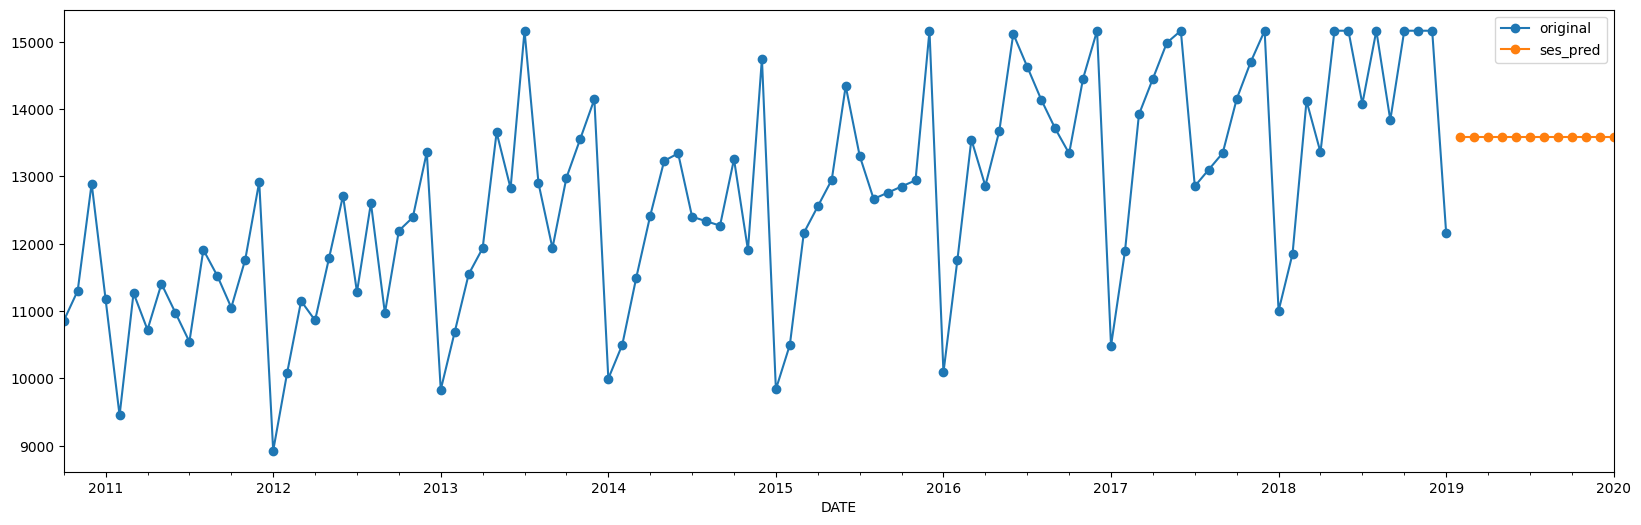

In [145]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level = 1/24)
pred = model.forecast(steps= 12)
mobile_sales.Sales.tail(100).plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o')
plt.legend()

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


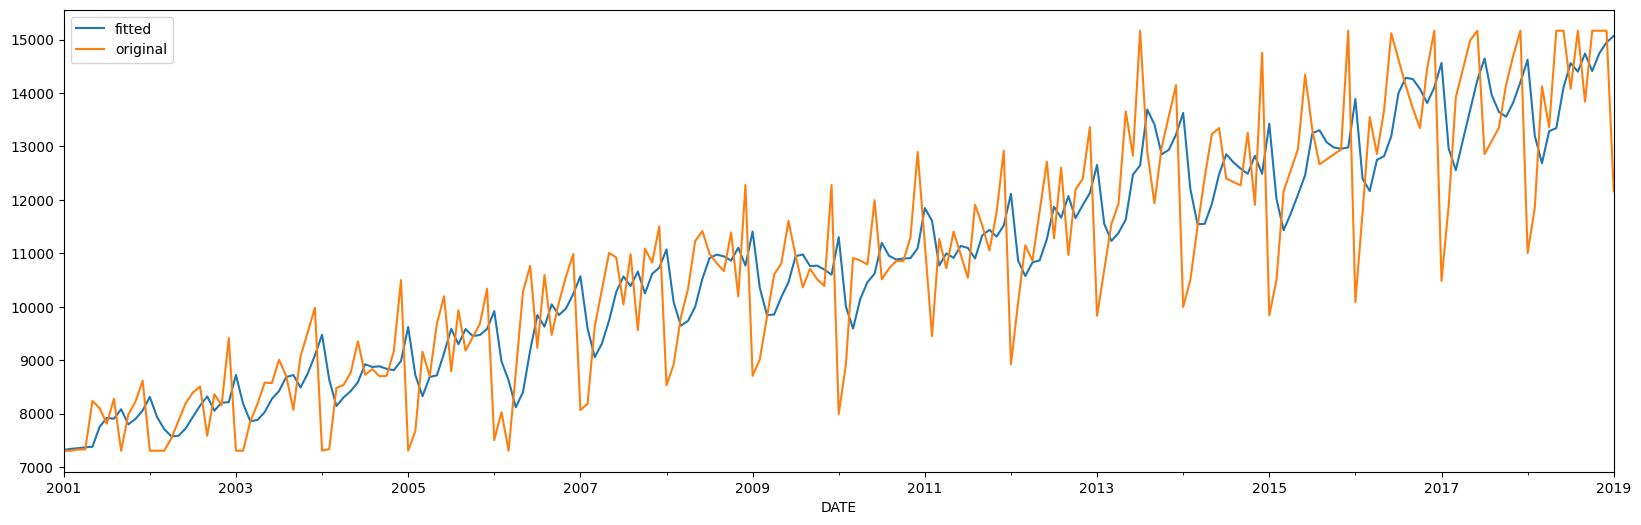

In [151]:
model1 = sm.tsa.ExponentialSmoothing(mobile_sales.Sales , trend='add').fit(smoothing_level=0.4)
model1.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

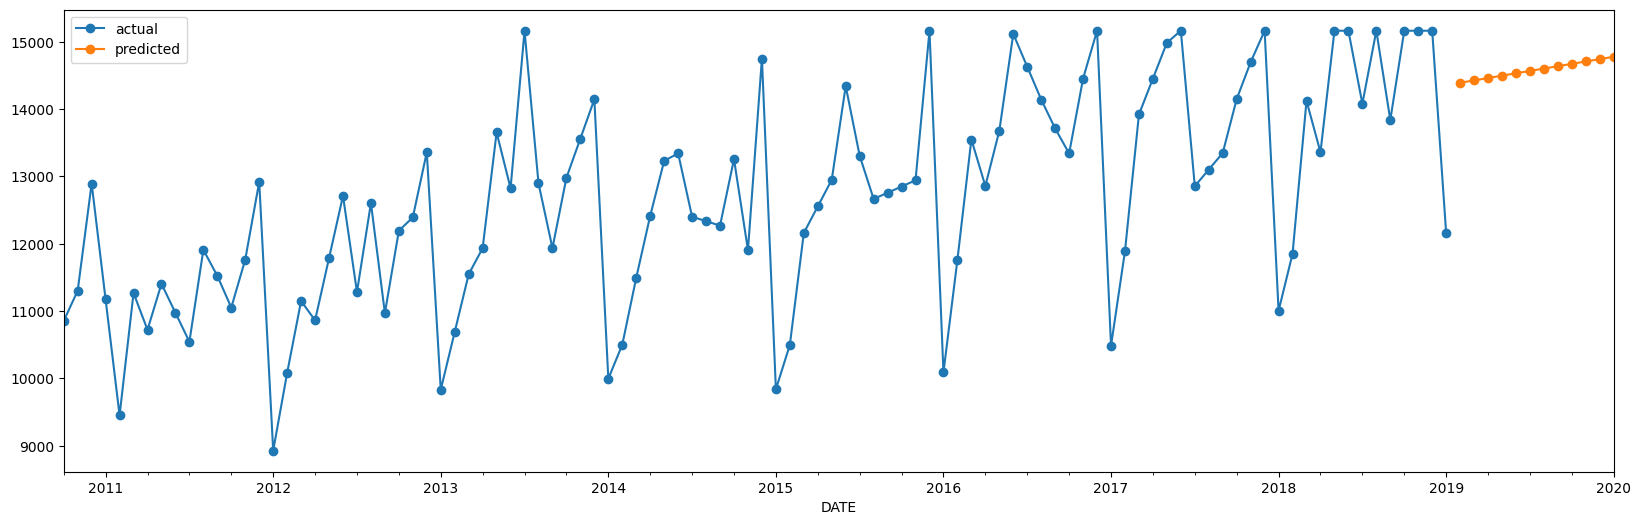

In [152]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE: 1294133.746
MAE: 30.731
MAPE: 0.069


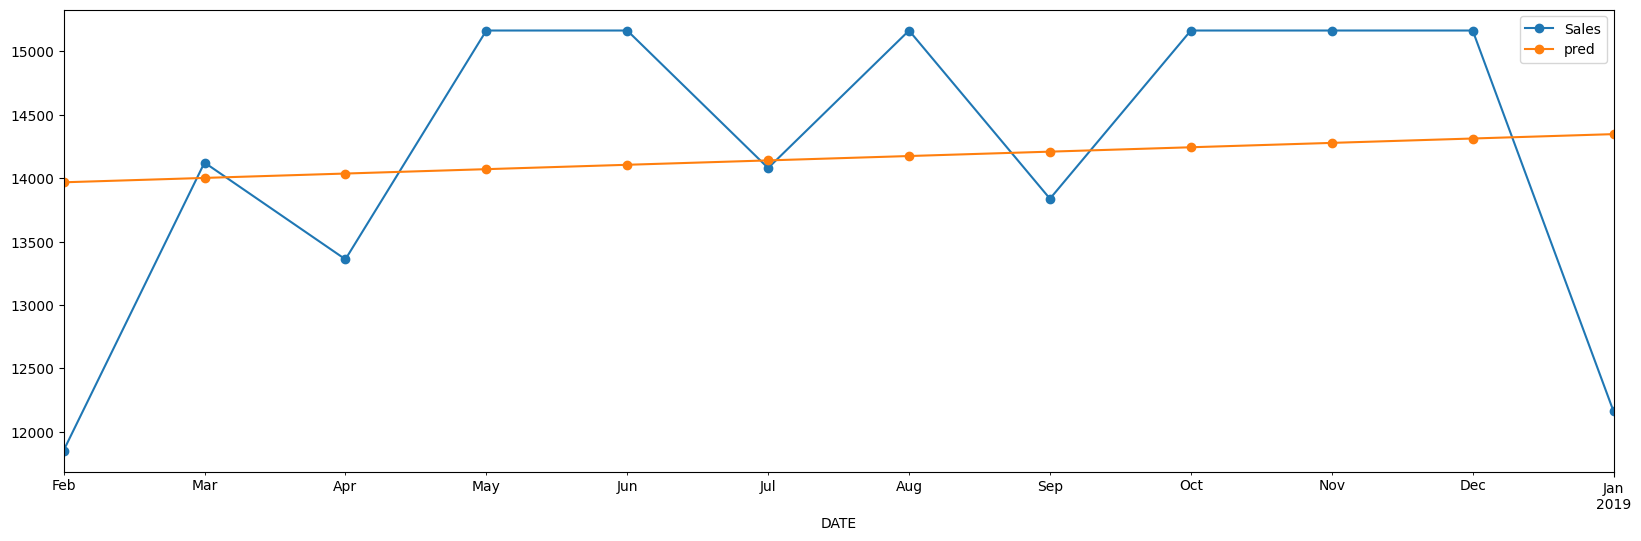

In [153]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

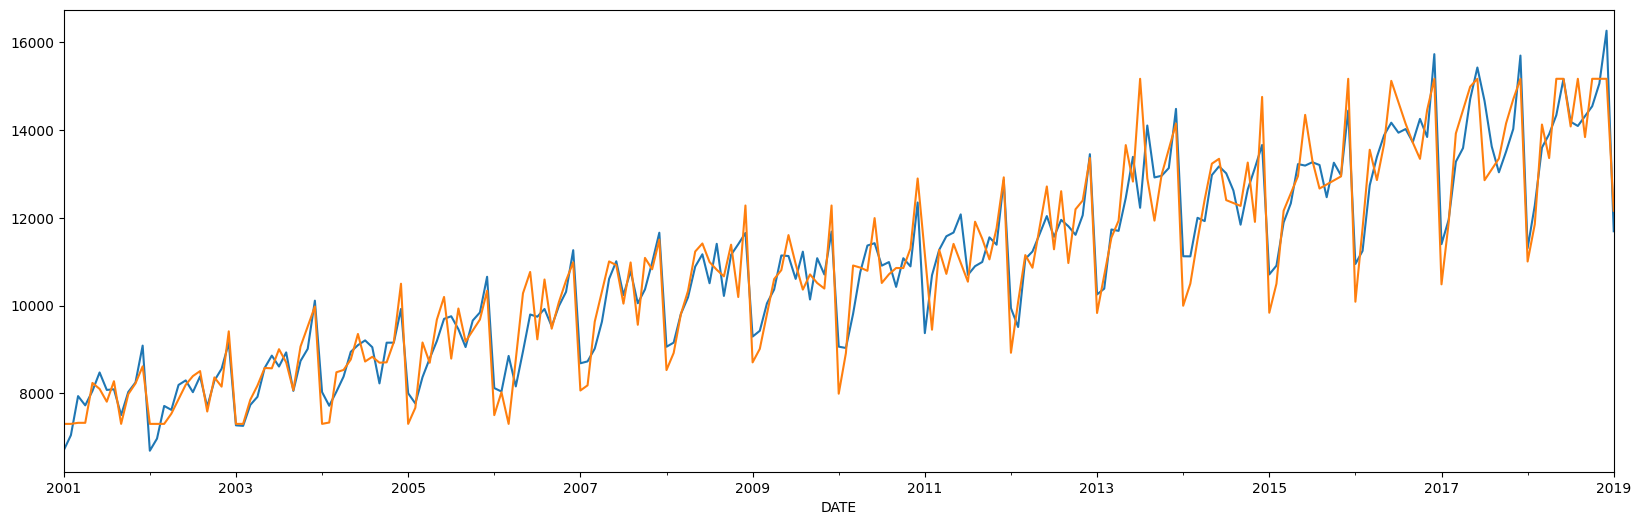

In [154]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal='add').fit(smoothing_level=0.4)
model.fittedvalues.plot()
mobile_sales.Sales.plot()

<Axes: xlabel='DATE'>

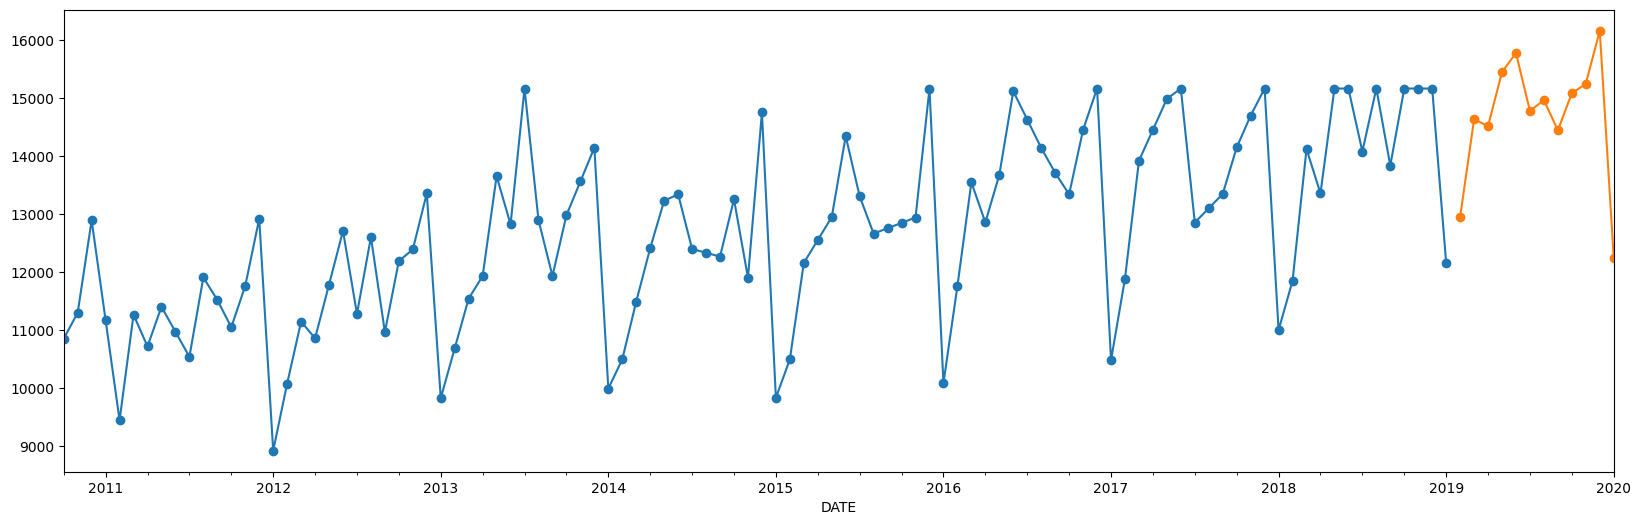

In [155]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o')
pred.plot(style='-o')

/home/vivobook/.local/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE: 278402.247
MAE: 21.647
MAPE: 0.033


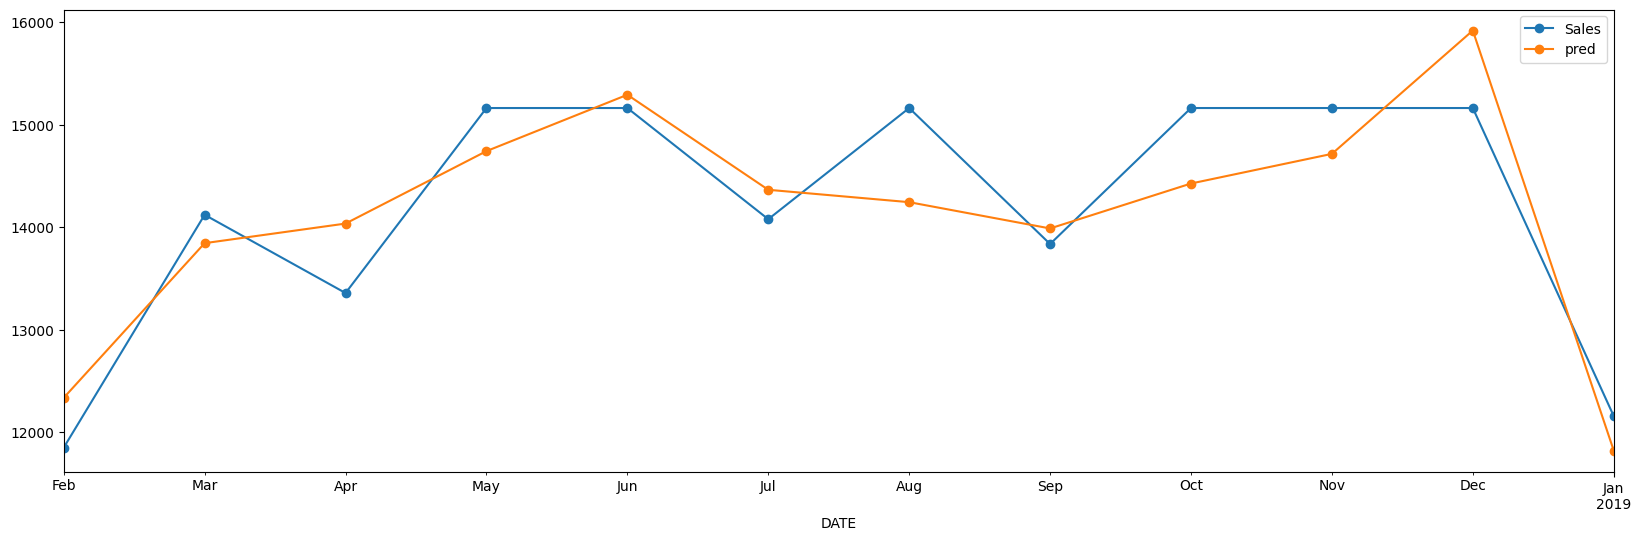

In [156]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])